In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Procedemos a unir los dos DF y revisarlos

In [18]:
df_flight_activity = pd.read_csv('Customer Flight Activity Clean.csv')
df_loyalty_history = pd.read_csv('Customer Loyalty History Clean.csv')

In [19]:
#Quiero ver todas las columnas
pd.set_option('display.max_columns', None) 

In [20]:
# Por columnas: usaremos un merge (por defecto es un inner join), para conservar solo los clientes que están en ambos CSV
# Común: Loyalty Number

df_completo = df_flight_activity.merge(df_loyalty_history, on=["loyalty_number"])
df_completo.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,1,3,0,3,1521,152,0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552,Married,Aurora,7919.20,Standard,2016,8,0,0
1,100102,2017,1,10,4,14,2030,203,0,0,Ontario,Toronto,M1R 4K3,Male,College,79422,Single,Nova,2887.74,Standard,2013,3,0,0
2,100140,2017,1,6,0,6,1200,120,0,0,British Columbia,Dawson Creek,U5I 4F1,Female,College,79422,Divorced,Nova,2838.07,Standard,2016,7,0,0
3,100214,2017,1,0,0,0,0,0,0,0,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253,Married,Star,4170.57,Standard,2015,8,0,0
4,100272,2017,1,0,0,0,0,0,0,0,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163,Divorced,Star,6622.05,Standard,2014,1,0,0


In [ ]:
df_completo['date'] = pd.to_datetime(df_completo[['year', 'month']].assign(DAY=1)) #formato datetime me exige incluir dia

# Eliminar Year y Month
df_completo = df_completo.drop(columns=['year', 'month'])

# Mover Date a la segunda columna (índice 1)
date_col = df_completo.pop('date')     
df_completo.insert(1, 'date', date_col) 

In [22]:
# Ahora modifico el nombre de las columnas que modifiqué anteriormente ya que he completado el análisis
df_completo.columns = df_completo.columns.str.replace('_', ' ').str.title()

In [23]:
# Guardo en un nuevo CSV

df_completo.to_csv('Customer Flight Activity & Loyalty History.csv', index=False)

In [30]:
df_completo.head(2)

,Loyalty Number,Date,Flights Booked,Flights With Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,Clv,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017-01-01,3,0,3,1521,152,0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552,Married,Aurora,7919.20,Standard,2016,8,0,0
1,100102,2017-01-01,10,4,14,2030,203,0,0,Ontario,Toronto,M1R 4K3,Male,College,79422,Single,Nova,2887.74,Standard,2013,3,0,0


---------------

-- FASE 2

1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [25]:
# elimino warnings que afectan para paletas que quedaron anticuadas y que no me aparezca texto encima del gráfico

import warnings
warnings.filterwarnings("ignore")

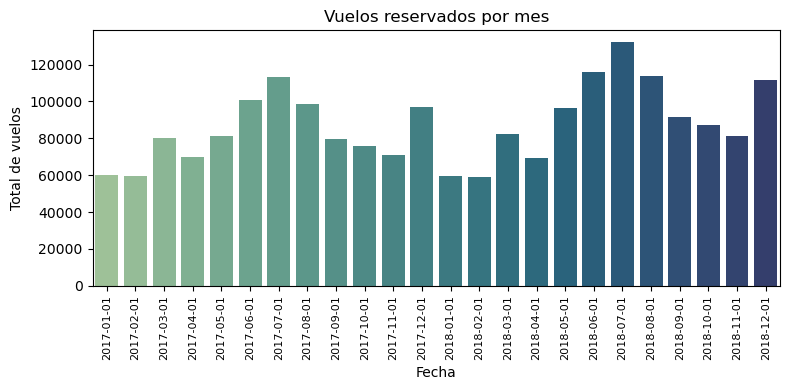

In [26]:
# Necesito las variables: Total Flights, Date 
# 2 variables, utilizo Barplot -> Nos sirve para resumir el grupo y ver las diferencias frente a esa variable.

# Primero agrupo por fechas Y el total de vuelos
vuelos_mes = df_completo.groupby('Date')['Total Flights'].sum().reset_index()

# Al haber convertido a dateframe, necesito usar ".dt.to_period('M')"" para agrupar por mes
df_barplot = df_completo.groupby(df_completo['Date'].dt.to_period('M'))['Total Flights'].sum().reset_index()

# Revertimos el period a dataframe utilizando "to_timestamp"
df_barplot['Date'] = df_barplot['Date'].dt.to_timestamp()

# Creamos gráfica:

plt.figure(figsize=(8,4))

sns.barplot(x = 'Date', 
            y = 'Total Flights', 
            data = df_barplot, 
            palette = "crest") 

plt.title('Vuelos reservados por mes')
plt.xlabel('Fecha')
plt.ylabel('Total de vuelos')

plt.xticks(rotation=90, fontsize=8) #para que no me salga el texto pisado, así lo dobla
plt.tight_layout() #lo empequeñece


Observamos una gráfica de barras donde encontramos por orden de fecha hacia la más reciente (eje x), y el total de vuelos (eje y).
- Podemos ver una tendencia ascendente, correlación positiva entre el paso del tiempo y el aumento en los vuelos reservados.
- La distribución coincide con el contexto turístico y las temporadas (incremento en temporada alta), especialmente en julio. Alcanzando el máximo en julio 2018 (superando los 120.000 vuelos en julio, el doble que en los meses de temporada baja).
- La temporada baja coincide en ambos años para los meses de enero y febrero, aproximadamente 60.000 vuelos por mes. Observamos un leve descenso en abril, probablemente por la falta de vacaciones/trabajo, o el aumento del precio de vuelos debido a festividades en algunas regiones y Semana Santa. 
- También observamos un pico en diciembre, probablemente para navidades y festividades (vuelta a casa, vacaciones). 

Como idea para la compañía podrían realizar promociones en los meses de menos demanda, ofertar paquetes turísticos para los meses de temporada baja.

----------------

 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?


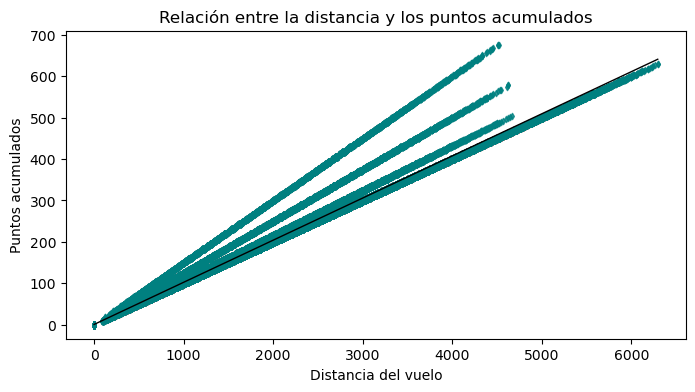

In [63]:
# Necesito las variables: Distance, Points Accumulated
# 2 variables y ambas numéricas -> Scatterplot o regplot: para ver la relación. En este caso usaré un regplot para observar la línea de tendencia

plt.figure(figsize=(8,4))

sns.regplot(x = "Distance", 
            y = "Points Accumulated", 
            data = df_completo, 
            marker = "d", 
            line_kws = {"color": "black", "linewidth": 1}, # color y grosor de la linea de tendencia
            scatter_kws = {"color": "teal", "s": 10} # color y tamaño de los puntos del scaterplot
            )

plt.xlabel("Distancia del vuelo")
plt.ylabel("Puntos acumulados")
plt.title("Relación entre la distancia y los puntos acumulados")
plt.show(); # para que se quite el texto de arriba de la gráfica

En este caso observamos un reglot con una línea ascendente de tendencia, organizando la distancia de los vuelos en el eje x y los puntos acumulados en el eje y.
- Encontramos relación entre las variables de correlación directa, ambas van en ascenso: A medida que los vuelos tienen mayor distancia, se le otorga más puntos al cliente. Muchas aerolíneas ofrecen programas como "viajero frecuente" donde se otorgan puntos/millas en función a la distancia de los vuelos.
- También apreciamos algunas líneas paralelas: probablemente se debe a que según la categoría de cliente, se le otorgan los puntos de diferentes formas
- No se aprecian outliners (no se le otorgaría un gran número de puntos a vuelos de poca distancia)


-----------

 3. ¿Cuál es la distribución de los clientes por provincia o estado?
 

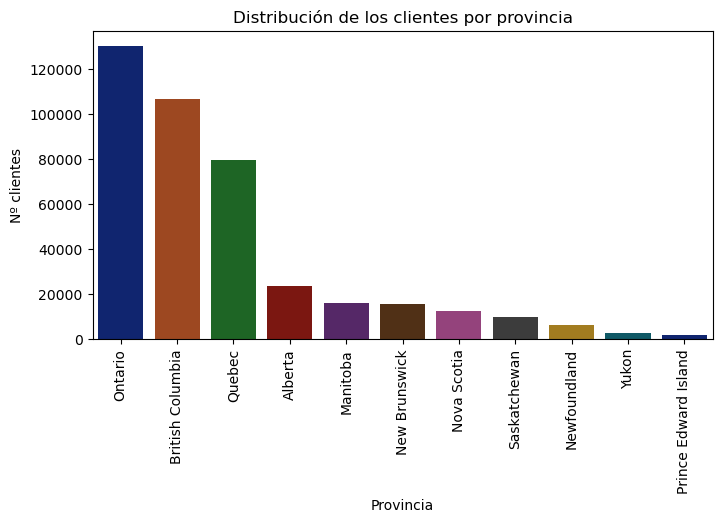

In [ ]:
# Necesito la variable: Province
# 2 una categórica y una numérica (Clientes) -> Countplot (Contar y comparar cuántas veces aparece cada categoría en una variable categórica)

plt.figure(figsize=(8,4))

sns.countplot(x = "Province", 
              data = df_completo,
              palette = "dark", 
              order=df_completo['Province'].value_counts().index
            )

plt.xticks(rotation = 90) #para que se lean mejor las etiquetas del eje x
plt.title("Distribución de los clientes por provincia")
plt.xlabel("Provincia")
plt.ylabel("Nº clientes");

Nuevamente obtenemos un gráfico de barras, ideal para comprobar la distribución de forma clara, con la provincia en el eje x y el número de clientes en el eje y.
- Hay una relación entre el número de clientes por provincia y el número de población en cada provincia.
- Como observamos en nuestra exploración de datos inicial, Ontario encabeza como la provincia con más clientes. Tiene sentido ya que abarca el 40% de la población total de Canadá, con cerca de 125.000 clientes registrados.
- Las provincias con menor número de clientes también cuentan con bajos índices de población, la Isla del Príncipe Eduardo (0.45% de población) y Yukon (0.11% de población).

Como conclusión podemos ver que a mayor número de población por provincia, mayor número de clientes tenemos registrados. Para las provincias intermedias en nuestro registro, se podrían realizar campañas de marketing para captar clientes.

--------------

 4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

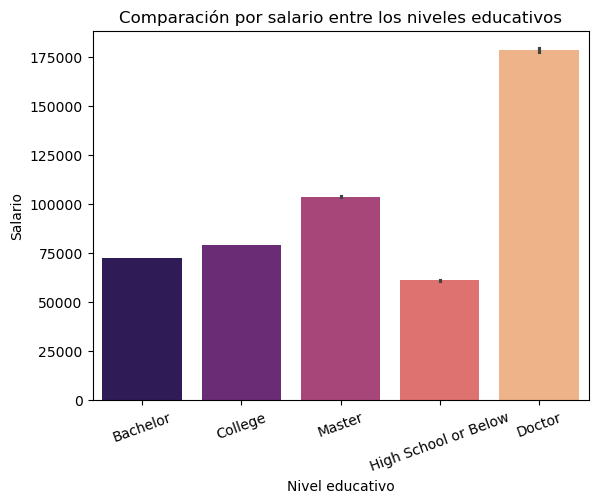

In [62]:
# Necesito las variables: Salary, Education
# 2 variable una categórica y una numérica -> Barplot (Comparar promedios)

sns.barplot(x = "Education", 
            y = "Salary", 
            data = df_completo,
            palette = "magma")

plt.xticks(rotation = 20)
plt.title("Comparación por salario entre los niveles educativos")
plt.xlabel("Nivel educativo")
plt.ylabel("Salario")
plt.show();

He optado en este caso por un barplot ya que calcula directamente el promedio y es práctico para observar la comparación. En este caso encontramos el nivel educativo en el eje x y el salario promedio en el eje y.
- Correlación positiva: A medida que aumenta una variable, la otra también lo hace. Conforme aumenta el nivel educativo también aumenta el salario, destacando los clientes con estudios de Doctorado (superando salario medio de 175.000 CAD) 
- Siguiendo a Doctorado encontramos Master, el nivel educativo anterior, superando los 100.000 CAD de promedio.
- High School or Below registra el rango con salario promedio más bajo, alrededor de 60.000 CAD.


---------------

 5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [47]:
# Trabajo con la variable "Loyalty Card" , donde tenemos 3 tipos de tarjeta
# Una variable categórica -> Pieplot (Mostrar la proporción de diferentes partes en relación con un todo)

# Como tenemos que hacer una serie de cálculos, no trabajamos con el DataFrame original. Necesitaremos 2 columnas:
# (por un lado una con los valores únicos de la columna categórica a visualizar y otra con el conteo por categoría)

df_cards = df_completo["Loyalty Card"].value_counts().reset_index()
df_cards

,Loyalty Card,count
0,Star,183745
1,Nova,136883
2,Aurora,83132


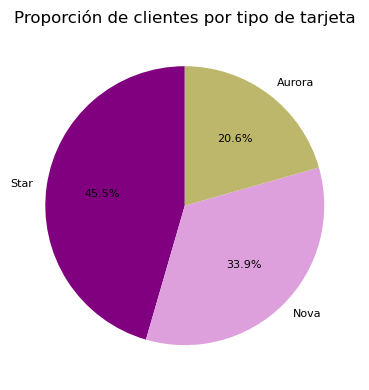

In [59]:
#Definimos los colores, debe tener el mismo número de elementos que en la columna a estudiar (3) y creamos el gráfico en base al anterior DF

colores = ["purple", "plum", "darkkhaki"]

plt.figure(figsize=(6,4))

plt.pie(df_cards["count"], 
        labels= df_cards["Loyalty Card"],
        data = df_completo, 
        autopct= '%1.1f%%', 
        colors = colores, 
        textprops={'fontsize': 8}, 
        startangle=90);

plt.title("Proporción de clientes por tipo de tarjeta")
plt.tight_layout()
plt.show()

Utilizamos un gráfico de quesitos en este caso para mostrar la proporción de clientes en relación al tipo de tarjeta de fidelidad. 

- Apreciamos claramente el predominio de las tarjetas Star, la poseen el 45.5% de clientes, seguidos de Nova y Aurora, la menos frecuente, con 20.6%.
- Probablemente las tarjetas Star o Nova dispongan de más ventajas para los clientes o sean más fácil de conseguir.
- En esta ocasión trabajamos con la librería Matplotlib, ya que este tipo no se encuentra disponible en seaborn.

In [ ]:
#Parámetro *autopct*:

#'%': Indica que el número formateado será seguido por un signo de porcentaje.
#'1.1f': Especifica cómo se formateará el número:
#`1`: El primer dígito indica que el campo tendrá al menos 1 carácter.
#`.1`: Indica que sólo se muestre un dígito después del punto decimal.
#`f`: Indica que el número se formateará como un número flotante.

---------

 6. ¿Cómo se distribuyen los clientes según su estado civil y género?

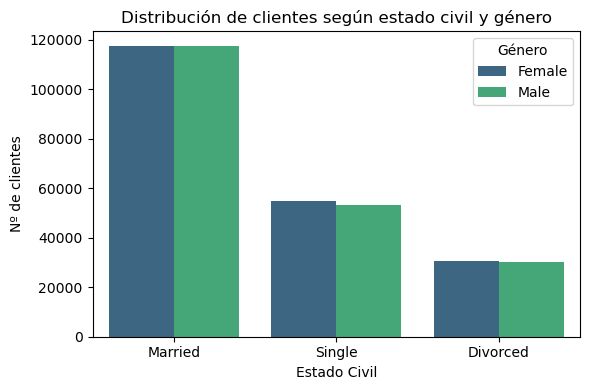

In [76]:
# Necesitamos las variables: Marital Status, Gender
# 2 variables categóricas -> Countplot (Diferentes categorías, mostrar el conteo de cada categoría)

plt.figure(figsize=(6,4))

sns.countplot(x = "Marital Status", 
              data = df_completo, 
              palette = "viridis", 
              hue = "Gender")

plt.title("Distribución de clientes según estado civil y género")
plt.xlabel("Estado Civil")
plt.ylabel("Nº de clientes")
plt.legend(title='Género')
plt.tight_layout()
plt.show(); 

Para estudiar estas dos variables he optado por un countplot, mostrando diferentes categorías. En el eje x encontramos el estado civil y género y en el eje y el número de clientes.
- Podemos observar un equilibrio en la distribución por género en todos los rangos, levemente inferior para clientes masculinos en el rango de 'Solteros'.
- La categoría principal es 'Casados', con cerca de 120.000 clientes.
- En la categoría de 'Solteros' encontramos practicamente la mitad de registros en comparación con Casados (cerca de 60.000 clientes).
- En el menor rango encontramos 'Divorced', con un registro de unos 30.000 clientes. 